# AI - CA5 - FeedForward NN - Mohammad Farrahi 810198451

### Importing

In [180]:
import numpy as np
import pandas as pd
from os import listdir
import PIL.Image as PilImg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

### Loading Images

In [74]:
loaded_images = list()
for filename in listdir('data'):
	img_data = (int(filename.split('.')[0]), np.asarray(PilImg.open('data/' + filename).convert(mode='L')))
	loaded_images.append(img_data)

loaded_images.sort(key=lambda x: x[0])

### Constructing features and labels dataframe

In [75]:
sample_arr_size = loaded_images[0][1].shape[0]*loaded_images[0][1].shape[1]
df = pd.DataFrame([img[1].flatten() % 256 for img in loaded_images],
                    columns=['PX'+str(i) for i in range(sample_arr_size)],
                    
    )
df.head()

,PX0,PX1,PX2,PX3,PX4,PX5,PX6,PX7,PX8,PX9,...,PX1014,PX1015,PX1016,PX1017,PX1018,PX1019,PX1020,PX1021,PX1022,PX1023
0,33,34,41,75,76,43,42,56,70,77,...,120,113,137,141,131,150,153,128,126,123
1,124,103,93,99,101,136,171,170,143,93,...,107,108,110,112,114,116,118,121,120,121
2,147,171,169,173,201,212,196,135,119,133,...,155,152,125,76,70,123,134,132,133,135
3,203,200,200,201,201,201,202,202,202,202,...,153,148,145,146,146,145,139,139,140,138
4,105,135,145,130,82,55,48,52,52,53,...,70,70,65,62,64,58,55,48,48,50


In [76]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,label
0,8,horse
1,10,cat
2,12,horse
3,13,horse
4,18,cat


### Spliting data to train/test

In [77]:
TEST_PORTION = 0.22
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=TEST_PORTION, random_state=42)

## Part 1

### 1-1) Showing random image from train data

range of pixel values: 41 to 237


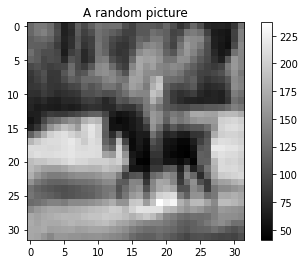

In [81]:
random_img = loaded_images[y_train.sample().index[0]][1]
plt.imshow(random_img, cmap='gray')
plt.colorbar()
plt.title('A random picture')
print('range of pixel values:', random_img.min(), 'to', random_img.max())

basically, range of pixel values are [0, 255]. In this particular image, the range of pixel values are shown in plot and max-min values are printed

### 1-2) Showing random image from each class

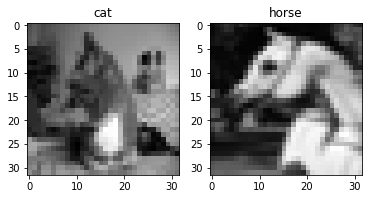

In [82]:
pic_classes = ['cat', 'horse']
fig, axes = plt.subplots(1, len(pic_classes), figsize =(6,3))
for ind, pic_class in enumerate(pic_classes):
    axes[ind].imshow(loaded_images[y_train[y_train['label'] == pic_class].sample().index[0]][1], cmap='gray')
    axes[ind].set_title(pic_class)
plt.show()

### 1-3) Size of samples for each class in train/test dataset

Number of pictures for each class in train and test data:


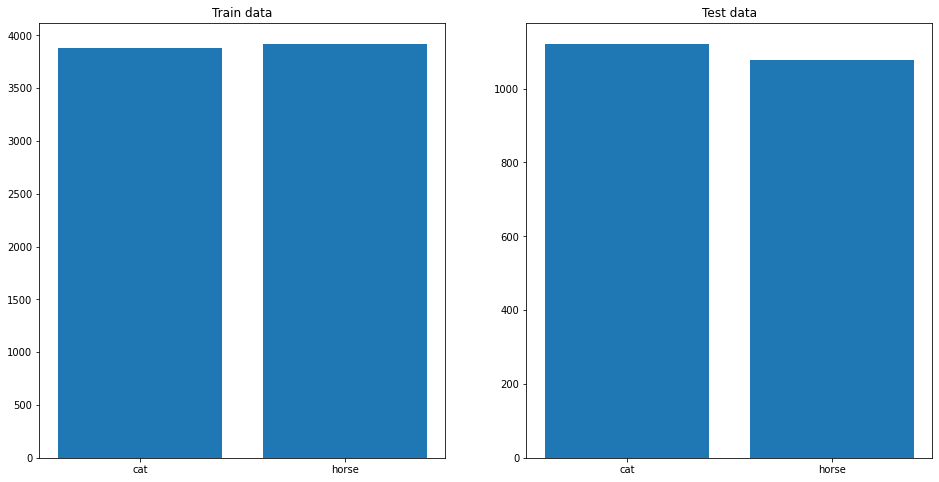

In [83]:
fig, axes = plt.subplots(1, 2, figsize =(16,8))

axes[0].bar(pic_classes, [y_train[y_train['label'] == pic_class].shape[0] for pic_class in pic_classes])
axes[1].bar(pic_classes, [y_test[y_test['label'] == pic_class].shape[0] for pic_class in pic_classes])
axes[0].set_title('Train data')
axes[1].set_title('Test data')
print('Number of pictures for each class in train and test data:')
plt.show()

These plots show the number of samples for each class in train and test data. It's look like in both train and test dataset, samples devided fairly enough between two classes.

### 1-4) Normalizing features

In [84]:
normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)
X_train[X_train.columns[:]] = normalizer.transform(X_train)
X_test[X_test.columns[:]] = normalizer.transform(X_test)
X_train

,PX0,PX1,PX2,PX3,PX4,PX5,PX6,PX7,PX8,PX9,...,PX1014,PX1015,PX1016,PX1017,PX1018,PX1019,PX1020,PX1021,PX1022,PX1023
5916,0.066667,0.066667,0.039216,0.035294,0.043137,0.043137,0.043137,0.050980,0.047059,0.035294,...,0.047059,0.274510,0.439216,0.286275,0.149020,0.070588,0.196078,0.200000,0.278431,0.321569
5129,0.376471,0.372549,0.368627,0.352941,0.349020,0.341176,0.349020,0.364706,0.380392,0.415686,...,0.619608,0.698039,0.682353,0.666667,0.709804,0.686275,0.615686,0.701961,0.725490,0.737255
8334,0.219608,0.211765,0.200000,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,...,0.172549,0.176471,0.180392,0.180392,0.184314,0.184314,0.184314,0.188235,0.192157,0.192157
1918,0.364706,0.435294,0.470588,0.415686,0.337255,0.345098,0.380392,0.360784,0.333333,0.349020,...,0.419608,0.423529,0.388235,0.400000,0.419608,0.435294,0.443137,0.443137,0.435294,0.439216
8330,0.356863,0.384314,0.360784,0.325490,0.337255,0.329412,0.325490,0.341176,0.321569,0.301961,...,0.305882,0.345098,0.313725,0.270588,0.294118,0.215686,0.247059,0.313725,0.309804,0.349020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.654902,0.749020,0.752941,0.780392,0.819608,0.835294,0.815686,0.784314,0.717647,0.545098,...,0.239216,0.321569,0.470588,0.498039,0.513725,0.466667,0.388235,0.258824,0.141176,0.058824
5191,0.149020,0.156863,0.156863,0.160784,0.164706,0.164706,0.164706,0.164706,0.164706,0.168627,...,0.266667,0.290196,0.309804,0.305882,0.290196,0.270588,0.313725,0.572549,0.792157,0.815686
5390,0.439216,0.356863,0.305882,0.278431,0.247059,0.215686,0.200000,0.188235,0.176471,0.164706,...,0.670588,0.658824,0.643137,0.611765,0.552941,0.545098,0.525490,0.505882,0.474510,0.462745
860,0.639216,0.580392,0.513725,0.576471,0.615686,0.737255,0.800000,0.619608,0.313725,0.262745,...,0.611765,0.545098,0.462745,0.498039,0.447059,0.450980,0.439216,0.439216,0.478431,0.466667


Our Model can be biased towards numerically larger values if the data is not scaled. If we don't normalize values of features, It may increase the difficulty of the problem being modeled. For exmaple large input values(in this case, pixel values), can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

## Part 2

## Dataloader

In [85]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        labels = pd.concat([labels, pd.get_dummies(labels['label'])], axis=1)
        onehot_vectors = labels.drop(columns=['label', 'id'])
        return onehot_vectors
    
    def __shuffle_dataset(self):
        self.__data, self.__onehot_labels = shuffle(self.__data, self.__onehot_labels)
        # self.__data.reset_index(drop=True)
        # self.__onehot_labels.reset_index(drop=True)
    
    def __iter__(self):   
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

## Activation Functions

In [86]:
class Identical:
    def __init__(self): pass

    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    def __init__(self): pass
    
    def __val(self, matrix):
        relu_value = np.maximum(matrix, np.zeros(matrix.shape))
        return relu_value

    def derivative(self, matrix):
        relu_derivative = (matrix > 0).astype(float)
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        slopes = np.zeros(matrix.shape, dtype=float)
        slopes[matrix > 0] = 1
        slopes[matrix <= 0] = self.negative_slope
        return np.multiply(matrix, slopes)

    def derivative(self, matrix):
        leacky_relu_derivative = np.zeros(matrix.shape, dtype=float)
        leacky_relu_derivative[matrix > 0] = 1
        leacky_relu_derivative[matrix <= 0] = self.negative_slope
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    def __init__(self): pass

    def __val(self, matrix):
        sigmoid_value = 1.0/(1.0+np.exp(-matrix))
        return sigmoid_value

    def derivative(self, matrix):
        sigmoid_val = self.__val(matrix)
        sigmoid_derivative = np.multiply(sigmoid_val, 1 - sigmoid_val)
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:    
    def __init__(self): pass

    def __val(self, matrix):
        softmax_value = np.apply_along_axis(lambda row: np.divide(np.exp(row - np.max(row)), np.sum(np.exp(row - np.max(row)))), 1, matrix)
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        tanh_value = np.divide(np.exp(matrix) - np.exp(-matrix), np.exp(matrix) + np.exp(-matrix))
        return tanh_value

    def derivative(self, matrix):
        tanh_derivative = 1 - np.power(self.__val(matrix), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

### Testing DataLoader

In [87]:
temp = Dataloader(X_test, y_test, n_classes=2, batch_size=5)
itr = iter(temp)
ft, lb = next(itr)
print(ft)
print(lb)

[[0.42745098 0.22745098 0.25490196 ... 0.2        0.18039216 0.27058824]
 [0.21568627 0.25098039 0.31372549 ... 0.23921569 0.24705882 0.2745098 ]
 [0.63529412 0.65490196 0.66666667 ... 0.69019608 0.74117647 0.75686275]
 [0.76078431 0.66666667 0.69411765 ... 0.65490196 0.72156863 0.89019608]
 [0.2745098  0.25490196 0.24313725 ... 0.59607843 0.63529412 0.65490196]]
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


We constructed a _temp_ instance of _DataLoader_ and tried for first batch of _temp_. It worked fine!

### Testing actication Funtions

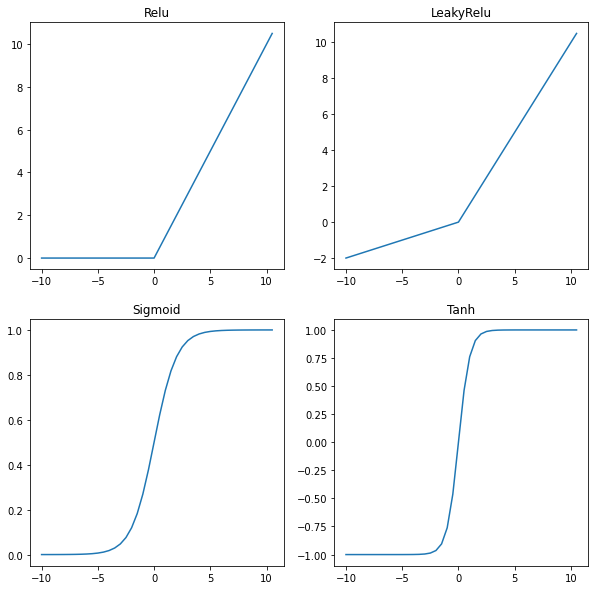

In [88]:
x = np.arange(-10,11,0.5)
fig, axes = plt.subplots(2,2,figsize=(10,10))
activation_functions = {'Relu':Relu(), 'LeakyRelu':LeakyRelu(0.2), 'Sigmoid':Sigmoid(), 'Tanh':Tanh()}
for ind, f_name in enumerate(list(activation_functions.keys())):
    axes[ind//2, ind%2].plot(x, activation_functions[f_name](x))
    axes[ind//2, ind%2].set_title(f_name)
plt.show()

We can see that, functions seem to work just fine.

## Loss Function

In [89]:
class CrossEntropy: #(with softmax)
    eps = 1e-40
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        softmax_vals = np.clip(Softmax()(true_val), self.eps, 1-self.eps)
        cross_entropy_value = np.array(np.sum(np.multiply(expected_val, -np.log2(softmax_vals)), axis=1))
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        cross_entropy_derivative = Softmax()(true_val) - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

## Layer

In [90]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = layer_input
        self.__last_activation_input = np.matmul(layer_input, self.weight) + self.bias
        self.__last_activation_output = self.activation(self.__last_activation_input)
        self.__last_activation_derivative = self.activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons

        partial_derivative_E_Z = np.multiply(backprop_tensor, self.__last_activation_derivative)
        weights_gradient = np.matmul(np.transpose(self.__last_input), partial_derivative_E_Z)
        backprop_tensor = np.matmul(partial_derivative_E_Z, np.transpose(self.__weight))
        self.__weight = self.__weight - np.multiply(lr, weights_gradient)

        self.__bias = self.__bias - np.divide(np.multiply(lr, np.matmul(np.matrix(np.ones((1,backprop_tensor.shape[0]))), partial_derivative_E_Z)), backprop_tensor.shape[0])

        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.matrix(np.random.uniform(low, high, (dim1,dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.matrix(np.random.normal(mean, np.sqrt(var), (dim1,dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

## Feed Forward Neural Network

In [91]:
class FeedForwardNN:
    def __init__(self, input_shape):      
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None
    

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):        
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):  
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for ind, (x_train, y_train) in enumerate(trainloader):
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        x_batch = np.matrix(x_batch)
        y_batch = np.matrix(y_batch)
        network_output = self.forward(x_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)

        self.__update_weights(network_output, y_batch)

        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        x_batch = np.matrix(x_batch)
        y_batch = np.matrix(y_batch)
        network_output = self.forward(x_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)

        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        def f(row):
            base_row = np.zeros(outputs.shape[1], dtype=int)
            base_row[np.argmax(row)] = 1
            return base_row
        labels = np.apply_along_axis(f, 1, outputs)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        accuracy = 100.0 * np.sum(np.multiply(self.__get_labels(output), expected_output)) / output.shape[0]
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        backprop_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backprop_tensor = layer.update_weights(backprop_tensor, self.__lr)
        return
    
    def predict(self, input_data):
        return self.__test(input_data)
        

## Part 3

### 3-1) Training Model

In [147]:
# Sample code for building and training a model

INPUT_SHAPE = df.shape[1]
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32
TRAINLOADER = Dataloader(X_train, y_train, 2, BATCH_SIZE, shuffle=False)
TESTLOADER = Dataloader(X_test, y_test, 2, batch_size=y_test.shape[0])
INITIAL_WEIGHTS_PARAM = {'low':0, 'high':0.05, 'mean': 0, 'var': 0.04 }

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=Relu(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=64, activation=Relu(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 61.193647540983605	Average Loss: 1.0145657844766753
	Test: Average Accuracy: 64.9090909090909	Average Loss: 0.8867181797617029
Epoch 2:
	Train: Average Accuracy: 67.35826502732239	Average Loss: 0.8693689760624256
	Test: Average Accuracy: 69.68181818181819	Average Loss: 0.8347329024176174
Epoch 3:
	Train: Average Accuracy: 69.90266393442623	Average Loss: 0.825693649515658
	Test: Average Accuracy: 71.27272727272727	Average Loss: 0.8051366389549456
Epoch 4:
	Train: Average Accuracy: 71.5548155737705	Average Loss: 0.7922658897625954
	Test: Average Accuracy: 72.4090909090909	Average Loss: 0.7881713439382734
Epoch 5:
	Train: Average Accuracy: 72.89959016393442	Average Loss: 0.7691979920603884
	Test: Average Accuracy: 72.81818181818181	Average Loss: 0.7892561562308978
Epoch 6:
	Train: Average Accuracy: 74.06933060109289	Average Loss: 0.74971524131888
	Test: Average Accuracy: 72.54545454545455	Average Loss: 0.7792517298550441
Epoch 7:
	Train: Average Accuracy

### 3-2) Weights impact

In [133]:
INITIAL_WEIGHTS_PARAM = {'low':0, 'high':0, 'mean': 0, 'var':0.04 }

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=Relu(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=64, activation=Relu(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)
INITIAL_WEIGHTS_PARAM = {'low':0, 'high':0.05, 'mean': 0, 'var':0.04 }

Epoch 1:
	Train: Average Accuracy: 50.11953551912569	Average Loss: 1.0000085736810542
	Test: Average Accuracy: 49.0	Average Loss: 1.000017791603549
Epoch 2:
	Train: Average Accuracy: 50.27322404371585	Average Loss: 1.0000045495699
	Test: Average Accuracy: 49.0	Average Loss: 1.0000339833688117
Epoch 3:
	Train: Average Accuracy: 50.27322404371585	Average Loss: 1.000001381941032
	Test: Average Accuracy: 49.0	Average Loss: 1.0000486629242789
Epoch 4:
	Train: Average Accuracy: 50.27322404371585	Average Loss: 0.9999988870347519
	Test: Average Accuracy: 49.0	Average Loss: 1.0000619286565873
Epoch 5:
	Train: Average Accuracy: 50.27322404371585	Average Loss: 0.9999969206888412
	Test: Average Accuracy: 49.0	Average Loss: 1.0000738839645686
Epoch 6:
	Train: Average Accuracy: 50.27322404371585	Average Loss: 0.9999953697860758
	Test: Average Accuracy: 49.0	Average Loss: 1.0000846331501325
Epoch 7:
	Train: Average Accuracy: 50.27322404371585	Average Loss: 0.9999941455512017
	Test: Average Accuracy: 

We can observe that in the former model which its initial weights were not zero at first, we've got better results.

### 3-3) Finding Best learning-rate

After so many trail and error, best learning rate that was discovered is __0.001__ with initial weights from normal disturbution. Since this value is as same as defualt value, we just show the results of __LR * 10__ and __LR * 0.1__

In [145]:
LEARNING_RATE = 0.001 * 10

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=Relu(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=64, activation=Relu(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 49.64993169398907	Average Loss: 7.17453503810743
	Test: Average Accuracy: 51.13636363636363	Average Loss: 0.9983759016009945
Epoch 2:
	Train: Average Accuracy: 49.32974726775956	Average Loss: 0.9998136501842094
	Test: Average Accuracy: 51.13636363636363	Average Loss: 0.9985685041372935
Epoch 3:
	Train: Average Accuracy: 49.594433060109296	Average Loss: 0.9995903210131628
	Test: Average Accuracy: 49.0	Average Loss: 0.9986960773368674
Epoch 4:
	Train: Average Accuracy: 49.86338797814208	Average Loss: 0.9995650518559126
	Test: Average Accuracy: 49.0	Average Loss: 0.9987385580727763
Epoch 5:
	Train: Average Accuracy: 49.965846994535525	Average Loss: 0.9994683329597089
	Test: Average Accuracy: 49.0	Average Loss: 0.998749994784183
Epoch 6:
	Train: Average Accuracy: 50.04269125683061	Average Loss: 0.9994525911906763
	Test: Average Accuracy: 49.0	Average Loss: 0.9987530700388985
Epoch 7:
	Train: Average Accuracy: 50.04269125683061	Average Loss: 0.999448408968

In [146]:
LEARNING_RATE = 0.001 * 0.1

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=Relu(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=64, activation=Relu(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 53.90198087431693	Average Loss: 1.056028577801528
	Test: Average Accuracy: 62.40909090909091	Average Loss: 0.9445149492029151
Epoch 2:
	Train: Average Accuracy: 58.40590846994536	Average Loss: 0.9824355526021297
	Test: Average Accuracy: 64.0	Average Loss: 0.9259996406631733
Epoch 3:
	Train: Average Accuracy: 60.77954234972677	Average Loss: 0.9531678817652479
	Test: Average Accuracy: 64.9090909090909	Average Loss: 0.9100059483282311
Epoch 4:
	Train: Average Accuracy: 62.713456284153	Average Loss: 0.931662971842284
	Test: Average Accuracy: 66.04545454545455	Average Loss: 0.8952595617749943
Epoch 5:
	Train: Average Accuracy: 64.05823087431693	Average Loss: 0.9133033675608083
	Test: Average Accuracy: 66.95454545454545	Average Loss: 0.8815159206038915
Epoch 6:
	Train: Average Accuracy: 65.4755806010929	Average Loss: 0.8961069421226701
	Test: Average Accuracy: 67.5	Average Loss: 0.8681796438375882
Epoch 7:
	Train: Average Accuracy: 66.56847677595628	Average

If we choose learning rate to be high, this may cause the model to converge too quickly and we may end in a suboptimal solution. As we know, learning rate effect on step size of getting close to optimal solution. If learning rate is too high, the model will can jump over optimal point which known as __overshooting__.


If we choose learning rate to be low, this may cause the model never converge or get stuck on a suboptimal solution. Also in this case, because step size is very small, the model will be slow.

Here we can see that if we choose __LR * 10__ we can imporve our accuracy and the model have kind of overshooting problem.

And in __LR * 0.1__ case, the model is slow such that in 15 epochs has less accuracy than when we used LR itself

### Activation function impact

#### Sigmoid

In [148]:
LEARNING_RATE = 0.001

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=Sigmoid(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=64, activation=Sigmoid(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 53.581796448087424	Average Loss: 0.9933521060613116
	Test: Average Accuracy: 56.63636363636363	Average Loss: 0.9770669080757641
Epoch 2:
	Train: Average Accuracy: 58.37175546448087	Average Loss: 0.97615964004572
	Test: Average Accuracy: 59.27272727272727	Average Loss: 0.9600234465041575
Epoch 3:
	Train: Average Accuracy: 59.720799180327866	Average Loss: 0.9644092113700328
	Test: Average Accuracy: 60.54545454545455	Average Loss: 0.9461724639032879
Epoch 4:
	Train: Average Accuracy: 60.76246584699454	Average Loss: 0.9534594483033899
	Test: Average Accuracy: 61.77272727272727	Average Loss: 0.9325457079988907
Epoch 5:
	Train: Average Accuracy: 61.90659153005464	Average Loss: 0.9419410416844322
	Test: Average Accuracy: 63.72727272727273	Average Loss: 0.918390815910262
Epoch 6:
	Train: Average Accuracy: 62.87995218579235	Average Loss: 0.9299184241838493
	Test: Average Accuracy: 65.04545454545455	Average Loss: 0.9039950164491259
Epoch 7:
	Train: Average Accu

#### Tanh

In [149]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=Tanh(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=64, activation=Tanh(), initial_weight='normal', **INITIAL_WEIGHTS_PARAM)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 61.240607923497265	Average Loss: 0.9454969143936932
	Test: Average Accuracy: 65.13636363636364	Average Loss: 0.8884924400875306
Epoch 2:
	Train: Average Accuracy: 66.31232923497268	Average Loss: 0.8784201471683938
	Test: Average Accuracy: 68.22727272727273	Average Loss: 0.8328922323033802
Epoch 3:
	Train: Average Accuracy: 69.18971994535518	Average Loss: 0.8345455198014144
	Test: Average Accuracy: 70.72727272727273	Average Loss: 0.8037183580547386
Epoch 4:
	Train: Average Accuracy: 71.01263661202186	Average Loss: 0.8014131446555621
	Test: Average Accuracy: 71.72727272727273	Average Loss: 0.7839468446435783
Epoch 5:
	Train: Average Accuracy: 72.63917349726776	Average Loss: 0.7740498401896896
	Test: Average Accuracy: 72.54545454545455	Average Loss: 0.7695952926282319
Epoch 6:
	Train: Average Accuracy: 73.9839480874317	Average Loss: 0.7494927792033615
	Test: Average Accuracy: 73.27272727272727	Average Loss: 0.7597877588720313
Epoch 7:
	Train: Average Acc

#### LeakyRelu

In [163]:
INITIAL_WEIGHTS_PARAM2 = {'low':-0.1, 'high':0.1, 'mean': 0, 'var':0.04 }
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=64, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM2)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 62.807377049180324	Average Loss: 1.0640771644010905
	Test: Average Accuracy: 68.36363636363636	Average Loss: 0.8460988233254527
Epoch 2:
	Train: Average Accuracy: 67.84494535519124	Average Loss: 0.8657578420525482
	Test: Average Accuracy: 71.63636363636364	Average Loss: 0.8081784408238194
Epoch 3:
	Train: Average Accuracy: 70.15454234972678	Average Loss: 0.8298290892159028
	Test: Average Accuracy: 73.68181818181819	Average Loss: 0.7863897665839641
Epoch 4:
	Train: Average Accuracy: 71.97745901639344	Average Loss: 0.8011569664326906
	Test: Average Accuracy: 73.22727272727273	Average Loss: 0.7750732484627729
Epoch 5:
	Train: Average Accuracy: 73.23685109289616	Average Loss: 0.7752774789604396
	Test: Average Accuracy: 73.63636363636364	Average Loss: 0.7668108349092132
Epoch 6:
	Train: Average Accuracy: 74.5090505464481	Average Loss: 0.7540538557187229
	Test: Average Accuracy: 74.77272727272727	Average Loss: 0.7542375401336973
Epoch 7:
	Train: Average Acc

__Tanh__ and __Sogmoid__ functions map input to output od range [-1,1] or [0,1] which may not be good in this model. Also, if we give bigger inputs to these functions, we get smaller derivative values; in fact, most derivative value that these funcions can give is less or equal to 1. So as we go deep in layers of model with lots of neurons, derivative values and also outpus of functions become smaller and smaller(as they multiply to getter) which not good.

__LeakyRelu__ function in contrast to __Leaky__ does not ignore negative values which is good and fixes __dying ReLU__ problem 

### Batch impact

#### BachSize=150

In [176]:
EPOCHS = 15
BATCH_SIZE = 150
TRAINLOADER = Dataloader(X_train, y_train, 2, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(X_test, y_test, 2, batch_size=y_test.shape[0])
INITIAL_WEIGHTS_PARAM2 = {'low':-0.1, 'high':0.1, 'mean': 0, 'var':0.04 }

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=64, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM2)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 50.52564102564103	Average Loss: 7.648006374048397
	Test: Average Accuracy: 54.18181818181818	Average Loss: 0.9949680181364562
Epoch 2:
	Train: Average Accuracy: 55.3974358974359	Average Loss: 0.9911299904560149
	Test: Average Accuracy: 57.31818181818182	Average Loss: 0.9800588229341346
Epoch 3:
	Train: Average Accuracy: 58.02564102564102	Average Loss: 0.9786488110134163
	Test: Average Accuracy: 59.54545454545455	Average Loss: 0.9708286530709205
Epoch 4:
	Train: Average Accuracy: 59.02564102564102	Average Loss: 0.9707816896760963
	Test: Average Accuracy: 60.68181818181818	Average Loss: 0.9638305962358469
Epoch 5:
	Train: Average Accuracy: 59.26923076923077	Average Loss: 0.964652621789868
	Test: Average Accuracy: 60.81818181818182	Average Loss: 0.9559096014802951
Epoch 6:
	Train: Average Accuracy: 60.26923076923076	Average Loss: 0.9596782488815698
	Test: Average Accuracy: 61.86363636363637	Average Loss: 0.9506135794851135
Epoch 7:
	Train: Average Accura

We can see, because batch size is little large, it seems, the number of iterations that model will do to updates its weights is not enough and we don't get good accuracy 

#### BachSize=16

In [177]:
BATCH_SIZE = 16
TRAINLOADER = Dataloader(X_train, y_train, 2, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(X_test, y_test, 2, batch_size=y_test.shape[0])
INITIAL_WEIGHTS_PARAM2 = {'low':-0.1, 'high':0.1, 'mean': 0, 'var':0.04 }

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=64, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM2)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 62.44877049180328	Average Loss: 0.9858845119635454
	Test: Average Accuracy: 66.0	Average Loss: 0.8840457507267931
Epoch 2:
	Train: Average Accuracy: 67.7126024590164	Average Loss: 0.8704806815946446
	Test: Average Accuracy: 70.68181818181819	Average Loss: 0.8216777721052898
Epoch 3:
	Train: Average Accuracy: 69.24948770491804	Average Loss: 0.8346070630886048
	Test: Average Accuracy: 69.4090909090909	Average Loss: 0.8704135560503358
Epoch 4:
	Train: Average Accuracy: 71.31147540983606	Average Loss: 0.80175492679515
	Test: Average Accuracy: 72.54545454545455	Average Loss: 0.790954671288196
Epoch 5:
	Train: Average Accuracy: 72.47694672131148	Average Loss: 0.7806264596952217
	Test: Average Accuracy: 68.63636363636364	Average Loss: 0.8682498508089367
Epoch 6:
	Train: Average Accuracy: 73.53995901639344	Average Loss: 0.7580089402835912
	Test: Average Accuracy: 74.22727272727273	Average Loss: 0.7696177553447323
Epoch 7:
	Train: Average Accuracy: 74.59016393

In this, It seems batch size of 16 does not make that mush difference

With help of batches, Training model requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

A smaller batch size, increases the number of forward/backward propagations, leading to a slower neural network. Also it leads to a higher variance, due to smaller number of training samples.

## Final Model

In [179]:
INPUT_SHAPE = df.shape[1]
LEARNING_RATE = 0.001
EPOCHS = 25
BATCH_SIZE = 32
TRAINLOADER = Dataloader(X_train, y_train, 2, BATCH_SIZE, shuffle=False)
TESTLOADER = Dataloader(X_test, y_test, 2, batch_size=y_test.shape[0])
INITIAL_WEIGHTS_PARAM2 = {'low':-0.1, 'high':0.1, 'mean': 0, 'var':0.04 }

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=256, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=64, activation=LeakyRelu(0.001), initial_weight='normal', **INITIAL_WEIGHTS_PARAM2)
network.add_layer(n_neurons=2, activation=Identical(), initial_weight='uniform', **INITIAL_WEIGHTS_PARAM2)
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 62.056010928961754	Average Loss: 1.0729086970383708
	Test: Average Accuracy: 67.63636363636364	Average Loss: 0.8611554501539194
Epoch 2:
	Train: Average Accuracy: 67.32411202185793	Average Loss: 0.8612925468353287
	Test: Average Accuracy: 70.68181818181819	Average Loss: 0.8058248341921902
Epoch 3:
	Train: Average Accuracy: 70.21431010928961	Average Loss: 0.8168470266370591
	Test: Average Accuracy: 71.68181818181819	Average Loss: 0.782380203270243
Epoch 4:
	Train: Average Accuracy: 71.53346994535518	Average Loss: 0.7881984063154817
	Test: Average Accuracy: 72.27272727272727	Average Loss: 0.7692486323320096
Epoch 5:
	Train: Average Accuracy: 73.03193306010928	Average Loss: 0.7652326472492601
	Test: Average Accuracy: 73.31818181818181	Average Loss: 0.7599643595883541
Epoch 6:
	Train: Average Accuracy: 74.13763661202186	Average Loss: 0.7447416244753912
	Test: Average Accuracy: 74.54545454545455	Average Loss: 0.7486176854206906
Epoch 7:
	Train: Average Acc